In [2]:
#Import libraries
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score
from sklearn.metrics import plot_confusion_matrix
import scoring_functions as f

import imp

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'D:\LEARNING\WELLS FARGO\NLP\CFPB\Data\complaints_processed.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['narrative'].isnull().sum()

27

In [4]:
#Cleaning the data
df = df.dropna()

In [5]:
df.shape

(387093, 2)

In [6]:
# Label encoding the target column product
df['product'].unique()

array(['credit_reporting', 'mortgages_and_loans', 'debt_collection',
       'retail_banking', 'credit_card'], dtype=object)

In [7]:
product_dict ={'credit_reporting': 0, 'debt_collection': 1, 'mortgages_and_loans': 2, 
               'credit_card': 3, 'retail_banking': 4}

In [8]:
df['product'].replace(product_dict, inplace=True)

In [9]:
df['product'].unique()

array([0, 2, 1, 4, 3], dtype=int64)

In [10]:
# Train test split
X = df.drop(['product'], axis=1)
y = df['product']

X_train, X_test, y_train, y_test = train_test_split(X['narrative'], y, test_size=0.20, random_state=200)

In [11]:
X_train.shape

(309674,)

In [12]:
X_test.shape

(77419,)

In [13]:
y_train.head()

260670    0
95237     0
157577    2
97621     0
330896    0
Name: product, dtype: int64

In [14]:
y_train.shape

(309674,)

In [15]:
#Feature engineering
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=1000000)
vect_X_train = vectorizer.fit_transform(X_train)
feature_names =  vectorizer.get_feature_names_out()

In [16]:
len(feature_names)

1000000

In [17]:
vect_X_train.shape

(309674, 1000000)

In [18]:
vect_X_test = vectorizer.transform(X_test)

In [19]:
# Model building

In [35]:
#Naive Bayes model
cls = MultinomialNB()
cls.fit(vect_X_train, y_train)

MultinomialNB()

In [36]:
# y_pred = cls.predict(vect_X_test)
y_pred = cls.predict(vect_X_train)

In [37]:
np.unique(y_pred)

array([0, 1, 2, 3, 4], dtype=int64)

In [38]:
f'The accuracy score is: {round(accuracy_score(y_train, y_pred)*100, 2)}%'

'The accuracy score is: 88.88%'

Accuracy: 88.9%
Precision: 89.9%
Recall: 70.9%
F1: 76.3%


Classification Report


              precision    recall  f1-score   support

           0       0.89      0.99      0.94    219907
           1       0.95      0.37      0.54     25333
           2       0.89      0.76      0.82     20849
           3       0.94      0.50      0.65     19083
           4       0.83      0.92      0.87     24502

    accuracy                           0.89    309674
   macro avg       0.90      0.71      0.76    309674
weighted avg       0.89      0.89      0.87    309674



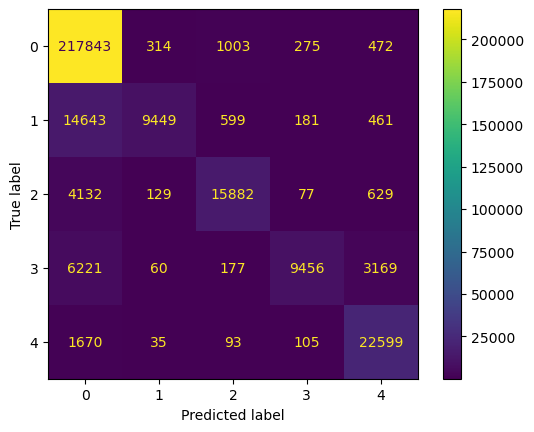

In [45]:
#imp.reload(f)
f.scoring(y_train, y_pred, cls, vect_X_train)

In [46]:
#Check for overfitting
test_y_pred = cls.predict(vect_X_test)
f'The accuracy score is: {round(accuracy_score(y_test, test_y_pred)*100, 2)}%'

'The accuracy score is: 86.65%'

In [47]:
recall_scr = round(recall_score(y_test, test_y_pred, average='macro'), 2) * 100
f'The recall score is {recall_scr}%'

'The recall score is 65.0%'

Accuracy: 86.6%
Precision: 87.6%
Recall: 64.8%
F1: 70.2%


Classification Report


              precision    recall  f1-score   support

           0       0.87      0.99      0.93     54808
           1       0.93      0.27      0.42      6352
           2       0.88      0.70      0.78      5337
           3       0.90      0.39      0.54      4759
           4       0.80      0.89      0.84      6163

    accuracy                           0.87     77419
   macro avg       0.88      0.65      0.70     77419
weighted avg       0.87      0.87      0.84     77419



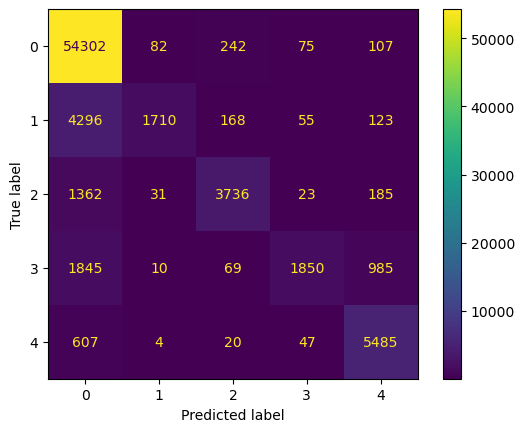

In [48]:
f.scoring(y_test, test_y_pred, cls, vect_X_test)

In [ ]:
#Random Forest
rdmfst = RandomForestClassifier(max_depth=20)
rdmfst.fit(vect_X_train, y_train)

In [50]:
y_pred = rdmfst.predict(vect_X_train)

Accuracy: 71.7%
Precision: 93.5%
Recall: 21.7%
F1: 19.9%


Classification Report


              precision    recall  f1-score   support

           0       0.71      1.00      0.83    219907
           1       1.00      0.01      0.02     25333
           2       0.99      0.02      0.04     20849
           3       1.00      0.00      0.01     19083
           4       0.97      0.05      0.10     24502

    accuracy                           0.72    309674
   macro avg       0.93      0.22      0.20    309674
weighted avg       0.79      0.72      0.60    309674



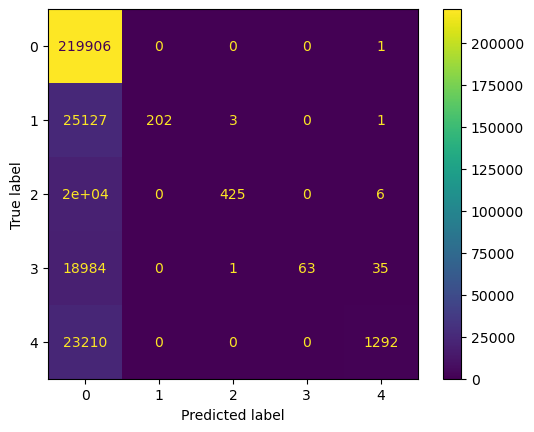

In [51]:
f.scoring(y_train, y_pred, rdmfst, vect_X_train)

In [52]:
test_y_pred = rdmfst.predict(vect_X_test)

Accuracy: 71.3%
Precision: 92.2%
Recall: 21.4%
F1: 19.2%


Classification Report


              precision    recall  f1-score   support

           0       0.71      1.00      0.83     54808
           1       1.00      0.01      0.01      6352
           2       0.97      0.01      0.03      5337
           3       1.00      0.00      0.00      4759
           4       0.92      0.05      0.09      6163

    accuracy                           0.71     77419
   macro avg       0.92      0.21      0.19     77419
weighted avg       0.79      0.71      0.60     77419



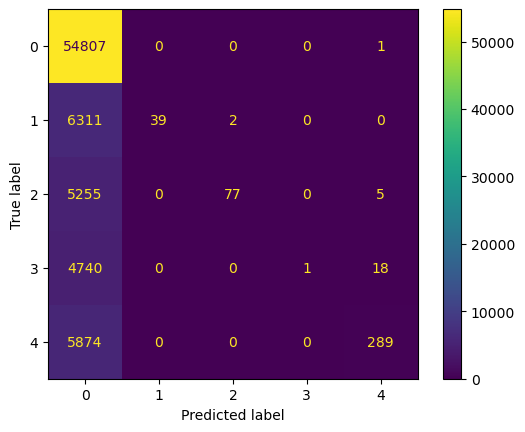

In [53]:
f.scoring(y_test, test_y_pred, rdmfst, vect_X_test)

In [54]:
#Decision Tree
dtree = DecisionTreeClassifier(max_depth=20)
dtree.fit(vect_X_train, y_train)

DecisionTreeClassifier(max_depth=20)

Accuracy: 92.4%
Precision: 88.9%
Recall: 82.2%
F1: 85.2%


Classification Report


              precision    recall  f1-score   support

           0       0.94      0.98      0.96    219907
           1       0.87      0.71      0.78     25333
           2       0.90      0.79      0.84     20849
           3       0.84      0.77      0.80     19083
           4       0.89      0.86      0.88     24502

    accuracy                           0.92    309674
   macro avg       0.89      0.82      0.85    309674
weighted avg       0.92      0.92      0.92    309674



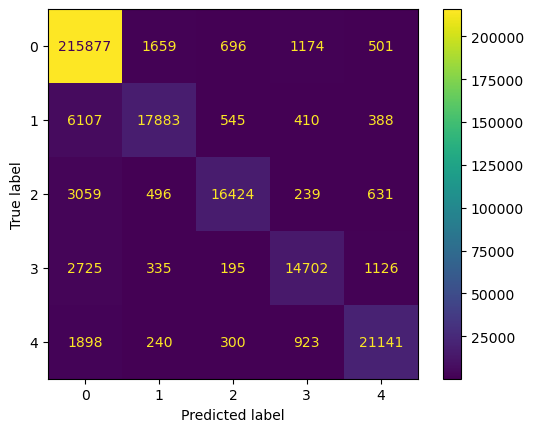

In [55]:
y_pred = dtree.predict(vect_X_train)
f.scoring(y_train, y_pred, dtree, vect_X_train)

In [56]:
test_y_pred = dtree.predict(vect_X_test)

Accuracy: 87.9%
Precision: 79.5%
Recall: 72.3%
F1: 75.4%


Classification Report


              precision    recall  f1-score   support

           0       0.92      0.97      0.94     54808
           1       0.74      0.57      0.64      6352
           2       0.81      0.67      0.74      5337
           3       0.70      0.62      0.66      4759
           4       0.80      0.78      0.79      6163

    accuracy                           0.88     77419
   macro avg       0.79      0.72      0.75     77419
weighted avg       0.87      0.88      0.87     77419



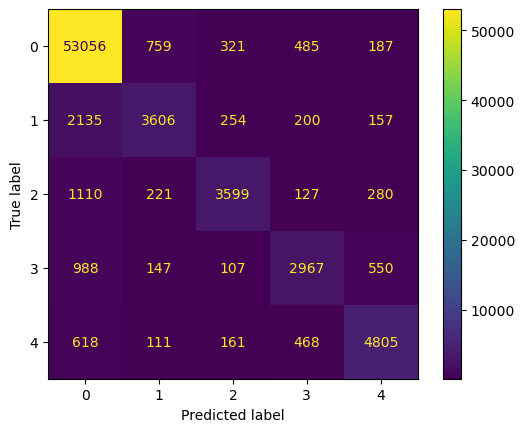

In [57]:
f.scoring(y_test, test_y_pred, dtree, vect_X_test)

In [58]:
#KNN
neigh = KNeighborsClassifier(n_neighbors=5, weights='distance')
neigh.fit(vect_X_train, y_train)

KNeighborsClassifier(weights='distance')

Accuracy: 99.8%
Precision: 99.8%
Recall: 99.5%
F1: 99.7%


Classification Report


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    219907
           1       1.00      0.99      0.99     25333
           2       1.00      1.00      1.00     20849
           3       1.00      0.99      1.00     19083
           4       1.00      1.00      1.00     24502

    accuracy                           1.00    309674
   macro avg       1.00      1.00      1.00    309674
weighted avg       1.00      1.00      1.00    309674



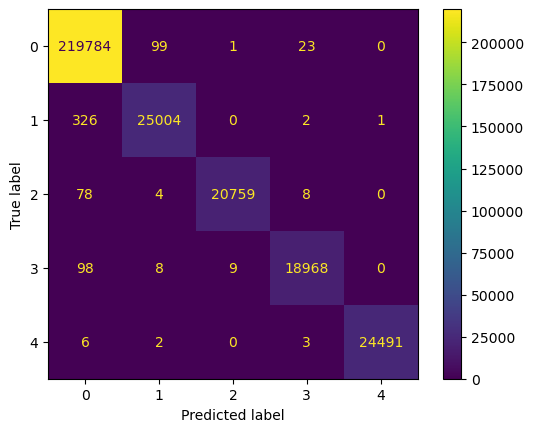

In [60]:
y_pred = neigh.predict(vect_X_train)
f.scoring(y_train, y_pred, neigh, vect_X_train)

Accuracy: 89.5%
Precision: 82.2%
Recall: 74.8%
F1: 78.0%


Classification Report


              precision    recall  f1-score   support

           0       0.93      0.98      0.95     54808
           1       0.81      0.62      0.70      6352
           2       0.84      0.70      0.76      5337
           3       0.74      0.62      0.68      4759
           4       0.80      0.82      0.81      6163

    accuracy                           0.90     77419
   macro avg       0.82      0.75      0.78     77419
weighted avg       0.89      0.90      0.89     77419



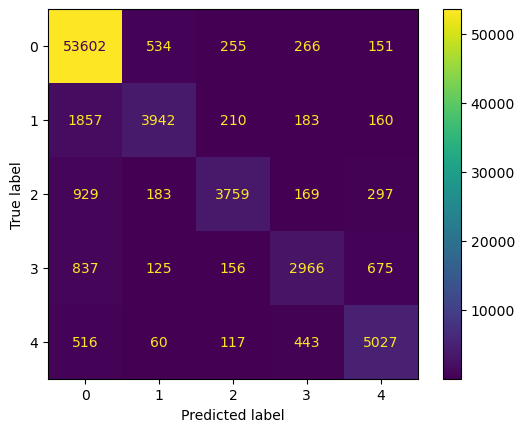

In [61]:
test_y_pred = neigh.predict(vect_X_test)
f.scoring(y_test, test_y_pred, neigh, vect_X_test)

Accuracy: 89.9%
Precision: 84.2%
Recall: 77.5%
F1: 80.6%


Classification Report


              precision    recall  f1-score   support

           0       0.92      0.97      0.95    219907
           1       0.77      0.62      0.69     25333
           2       0.85      0.75      0.80     20849
           3       0.79      0.69      0.74     19083
           4       0.87      0.84      0.86     24502

    accuracy                           0.90    309674
   macro avg       0.84      0.78      0.81    309674
weighted avg       0.89      0.90      0.90    309674



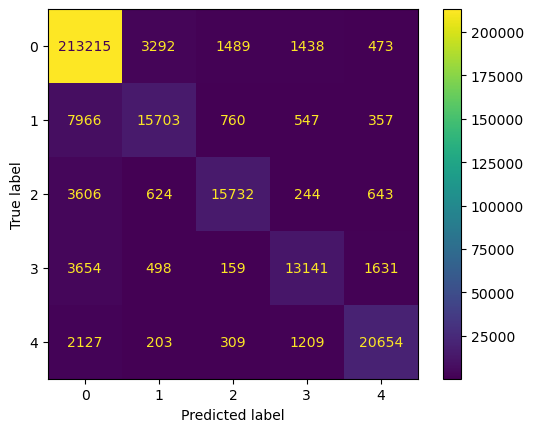

In [20]:
#Gradient Boosting
gboost = GradientBoostingClassifier(max_depth=3)
gboost.fit(vect_X_train, y_train)
y_pred = gboost.predict(vect_X_train)
f.scoring(y_train, y_pred, gboost, vect_X_train)

Accuracy: 89.6%
Precision: 83.9%
Recall: 77.1%
F1: 80.1%


Classification Report


              precision    recall  f1-score   support

           0       0.92      0.97      0.94     54808
           1       0.77      0.61      0.68      6352
           2       0.85      0.75      0.79      5337
           3       0.78      0.69      0.73      4759
           4       0.87      0.84      0.86      6163

    accuracy                           0.90     77419
   macro avg       0.84      0.77      0.80     77419
weighted avg       0.89      0.90      0.89     77419



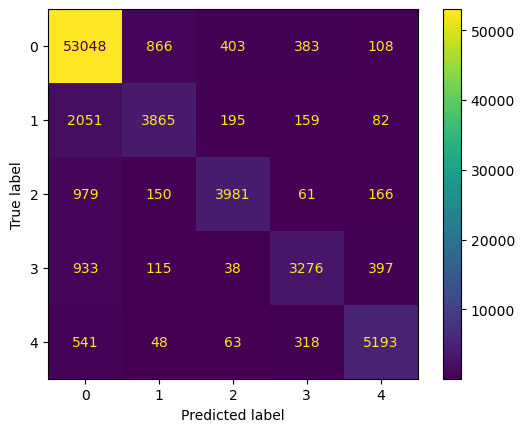

In [21]:
test_y_pred = gboost.predict(vect_X_test)
f.scoring(y_test, test_y_pred, gboost, vect_X_test)

Accuracy: 93.4%
Precision: 89.3%
Recall: 85.9%
F1: 87.5%


Classification Report


              precision    recall  f1-score   support

           0       0.96      0.98      0.97    219907
           1       0.84      0.74      0.79     25333
           2       0.90      0.85      0.87     20849
           3       0.86      0.80      0.83     19083
           4       0.91      0.92      0.92     24502

    accuracy                           0.93    309674
   macro avg       0.89      0.86      0.88    309674
weighted avg       0.93      0.93      0.93    309674



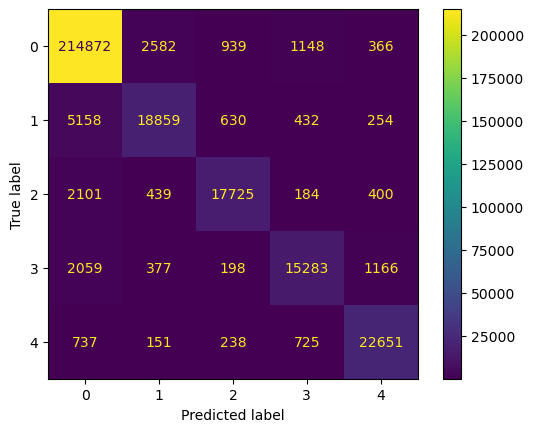

In [22]:
#XGBoost
xgb = XGBClassifier()
xgb.fit(vect_X_train, y_train)
y_pred = xgb.predict(vect_X_train)
f.scoring(y_train, y_pred, xgb, vect_X_train)

Accuracy: 91.7%
Precision: 85.9%
Recall: 82.4%
F1: 84.0%


Classification Report


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     54808
           1       0.80      0.69      0.74      6352
           2       0.86      0.80      0.83      5337
           3       0.80      0.76      0.78      4759
           4       0.89      0.89      0.89      6163

    accuracy                           0.92     77419
   macro avg       0.86      0.82      0.84     77419
weighted avg       0.91      0.92      0.92     77419



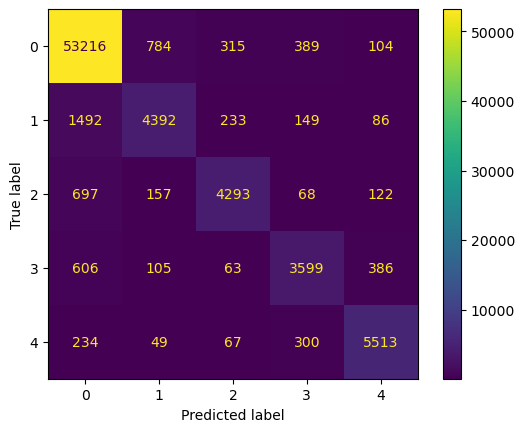

In [23]:
test_y_pred = xgb.predict(vect_X_test)
f.scoring(y_test, test_y_pred, xgb, vect_X_test)

|model|Train accuracy|Test accuracy|train recall|test recall|accuracy difference|recall difference|Notes|
|:---:|:------------:|:-----------:|:----------:|:---------:|:-----------------:|:---------------:|:---:|
|Naive Bayes|88.9%|86.6%|70.9%|64.8%|2.3|6.1|Many products had poor recall. Model is biased towards class with most data points.Any refinements would need weighting.|
|Random Forest|71.7%|71.3%|21.7%|21.4%|0.3|0.3|	Well fitted,but not great performance. Modelbiased towards class with most data points.|
|Decision Tree|92.4%|87.9%|82.2%|72.3%|4.5|9.9|Good recall with individual categories on train and test. Fitted Ok.|
|KNN|99.8%|89.5%|99.5%|74.8%|10.29|24.7|Category recall scores not as good. Poor fit between train & test, class recall scores off. Model takes a long time to run.|
|Gradient Boosting|89.9%|89.6%|77.5%|77.1%|0.3|0.4|Well fitted. Some classes have so-so recall comparisons. Takes long to run.|
|XGBoost|93.4%|91.7%|85.9%|82.4%|1.7|3.5|Very well fitted. Some classes have so-so recall.|

##### For Model Finetuning

Gradient Boosting and XGBoost are similar, but Gradient Boosting is a little better.

MultinomalNB might do better with SMOTE or class_weight to remove the bias in the class.

XG Boost and Decision Tree has the best accuracy. Might be worth seeing with refinements